In [189]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import f1_score,auc,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [149]:
X,y = make_classification(n_samples=1000,n_features=6,n_informative=1,n_redundant=1,n_repeated=1,n_clusters_per_class=1,weights=[0.9,0.1])

In [150]:
y.shape

(1000,)

In [151]:
df = pd.DataFrame(np.c_[X,y])
df.shape

(1000, 7)

In [152]:
df.head()

,0,1,2,3,4,5,6
0,1.989002,0.230493,1.586643,1.989002,-0.453819,-0.062240,1.0
1,-1.011417,-1.683465,-1.094271,-1.011417,-1.653308,0.031650,0.0
2,-1.219983,0.619952,0.409634,-1.219983,1.188522,0.038176,0.0
3,-0.772284,-1.278048,0.377953,-0.772284,0.661519,0.024167,0.0
4,-0.223312,0.565045,0.491333,-0.223312,0.328052,0.006988,0.0


In [153]:
df[6].value_counts()

0.0    896
1.0    104
Name: 6, dtype: int64

In [154]:
clf = LogisticRegression() 

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [181]:
pipe1 = Pipeline([('scaler',MinMaxScaler()),('logit',LogisticRegression())])
pipe1.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logit', LogisticRegression())])

In [182]:
pipe2 = Pipeline([('standard',MinMaxScaler())],verbose=True)

In [184]:
X_test = pipe2.fit_transform(X_test)

[Pipeline] .......... (step 1 of 1) Processing standard, total=   0.0s


In [188]:
pred = pipe1.predict(X_test)

<AxesSubplot:>

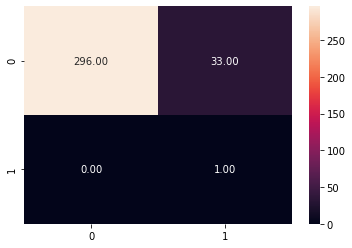

In [191]:
sns.heatmap(confusion_matrix(pred,Y_test),annot=True,fmt='.2f')

# with balanced weights

In [196]:
clf2 = LogisticRegression(class_weight='balanced')

In [209]:
pipe3 = Pipeline([('scaler',MinMaxScaler()),('logit',clf2)])
pipe3.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logit', LogisticRegression(class_weight='balanced'))])

In [210]:
pipe3.named_steps

{'scaler': MinMaxScaler(),
 'logit': LogisticRegression(class_weight='balanced')}

In [211]:
pipe3.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logit', LogisticRegression(class_weight='balanced'))])

In [212]:
pred2 = pipe3.predict(X_test)

<AxesSubplot:>

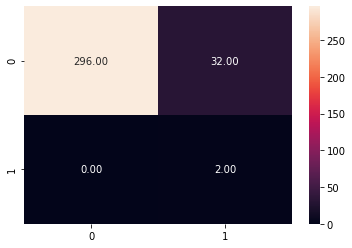

In [229]:
sns.heatmap(confusion_matrix(pred2,Y_test),annot=True,fmt='.2f')

In [234]:
f1_score(pred2,Y_test)

0.1111111111111111

# With Manual Weights

In [222]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=10,
    verbose=True
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters : {'class_weight': {0: 0.23947368421052628, 1: 0.7605263157894737}}


In [223]:
grid_result.cv_results_

{'mean_fit_time': array([0.00374379, 0.00335083, 0.00399666, 0.0040611 , 0.00413601,
        0.00268927, 0.00376918, 0.0032953 , 0.00291083, 0.00438726,
        0.00482662, 0.00369461, 0.00359344, 0.00417271, 0.00339606,
        0.00279238, 0.00304892, 0.00339816, 0.00379632, 0.00435166]),
 'std_fit_time': array([0.00074868, 0.000958  , 0.00044637, 0.00044156, 0.0006234 ,
        0.00064243, 0.00038469, 0.00078252, 0.00094429, 0.00129471,
        0.00062224, 0.00118546, 0.00066321, 0.00073057, 0.00091197,
        0.00039901, 0.00016896, 0.00048363, 0.00060811, 0.00077247]),
 'mean_score_time': array([0.00103624, 0.00106812, 0.0014308 , 0.00112514, 0.0013185 ,
        0.00092306, 0.00123286, 0.00124745, 0.00091858, 0.001616  ,
        0.00145769, 0.00109253, 0.00119383, 0.00111952, 0.0009973 ,
        0.00069826, 0.00094106, 0.00059204, 0.00090654, 0.00100462]),
 'std_score_time': array([3.53741382e-04, 3.26288156e-04, 4.62348557e-04, 3.69979958e-04,
        4.47081446e-04, 3.16835762e-

In [224]:
grid_result.best_estimator_

LogisticRegression(class_weight={0: 0.23947368421052628, 1: 0.7605263157894737})

In [225]:
clf3 = grid_result.best_estimator_

In [226]:
X_train = MinMaxScaler().fit_transform(X_train)

In [227]:
clf3.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 0.23947368421052628, 1: 0.7605263157894737})

In [231]:
pred3 = clf3.predict(X_test)

<AxesSubplot:>

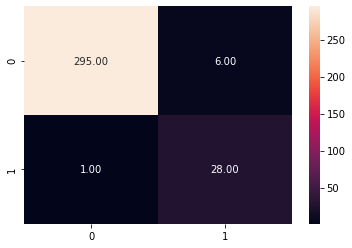

In [232]:
sns.heatmap(confusion_matrix(pred3,Y_test),annot=True,fmt='.2f')

In [233]:
f1_score(pred3,Y_test)

0.888888888888889